# Lewitus's neuronal proliferation lineages

Lewitus et al (2014) describe 7 different lineages of neuronal proliferation. The number of neurones produced by each lineage is modeled by a series. This is the implementation of these series.

This schema represents the first of these lineages:

In [1]:
%%html
<svg>
<path d="M100,10 L100,100" stroke='black'/>
<path d="M100,10 L100,55 L140,55 L140,100" stroke='black' fill='none'/>
<path d="M100,10 C60,10 60,100 100,100" stroke='black' fill='none'/>
<circle cx=100 cy=10 r=10 fill='blue'/>
<circle cx=100 cy=100 r=10 fill='blue'/>
<circle cx=140 cy=100 r=10 fill='green'/>
</svg>

An apical progenitor cell in blue divides asymmetrically into 2 daughter cells: one is an apical progenitor of the same type, the other a neurone (which does not divide). After each cycle of asymmetric cell division, 1 new neurone is produced.

After $N$ rounds of asymmetric division following this lineage, $N$ neurones should be produced, however, the series in Lewitus et al (2014) is:

$num_{neurones}(N) = \sum_{i}^N {n_i}$.

In the article it is indicated that $n_i$ is "the number of $i$ divisions". It's not completely clear to me what this means. It could be that $n_i=i$, because after $i$ divisions the number of divisions is $i$... However, if this were the case, the formula for the number of neurones would be incorrect. It would not require a summation, and be simply like this:

$num_{neurones}(N)=N$.

For the formula to hold, $n_i$ should be the number of neurones added at the $i$-th iteration, then $n_i=1$ for every $i$. But this does not make much sense for the other series...

In the code that follows I will assume that $n_i=i$, and then, that the summations are not required.

In [2]:
%pylab inline
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


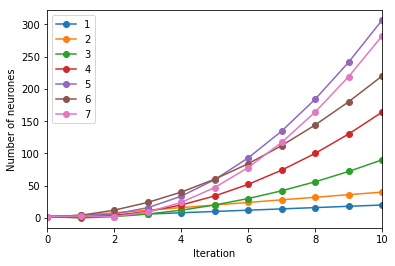

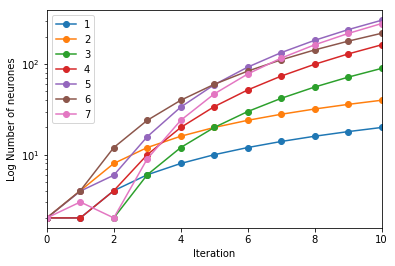

In [3]:
# Niter steps of neuronal proliferation
Niter=10;
N=2;    # initial progenitor pool
c=0.989; # a constant for convergence

S=pd.DataFrame([[N,N,N,N,N,N,N]]);
for i in range(1,Niter+1):
    S.loc[i]=[                       # lineage
        N*( i ),                     # 1
        N*( 2*i ),                   # 2
        N*( (i-1)*i/2 ),             # 3
        N*( (i-2+2/i)*i ),           # 4
        N*( (2*i-5+5/i)*i*c ),       # 5
        N*( (i+1)*i ),               # 6
        N*( (2*i-13/2+6/i)*i )       # 7
    ];
S.columns=[1,2,3,4,5,6,7]

# Plot
ax=S.plot(style="o-")
ax.set_xlabel("Iteration");
ax.set_ylabel("Number of neurones");

ax=S.plot(style="o-",logy=True)
ax.set_xlabel("Iteration");
ax.set_ylabel("Log Number of neurones");